#   **1. Prepare: import libraries**

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,cross_val_score, train_test_split

!pip install pandas_profiling
from pandas_profiling import ProfileReport

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 16.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=cf2f062a6c14811c863c53e3b5057cebf5f9f6e6d10ea10f4ac779ab11dced74
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


<ipython-input-1-6bbfbdea6011>:21: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


## 1.1 Load dataset and checking info

In [2]:
# Import file
from google.colab import drive
# uploaded = files.upload()
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
fraud_train =pd.read_csv('/content/drive/MyDrive/dataset/fraudTrain.csv')
fraud_test=pd.read_csv('/content/drive/MyDrive/dataset/fraudTest.csv')

In [4]:
# fraud_train=pd.read_csv(trainpath)
# fraud_test=pd.read_csv(testpath)

In [5]:
# review DF
fraud_train.head()

,merchant,category,amt,gender,city_pop,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,3495,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,149,0
2,fraud_Lind-Buckridge,entertainment,220.11,M,4154,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,1939,0
4,fraud_Keeling-Crist,misc_pos,41.96,M,99,0


In [6]:
fraud_test.head()

,merchant,category,amt,gender,city_pop,is_fraud
0,fraud_Kirlin and Sons,personal_care,2.86,M,333497,0
1,fraud_Sporer-Keebler,personal_care,29.84,F,302,0
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,34496,0
3,fraud_Haley Group,misc_pos,60.05,M,54767,0
4,fraud_Johnston-Casper,travel,3.19,M,1126,0


In [7]:
#Checking shape of df fraud_train
np.shape(fraud_train)

(1048575, 6)

In [8]:
# Checking info of fraud_train df
fraud_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   merchant  1048575 non-null  object 
 1   category  1048575 non-null  object 
 2   amt       1048575 non-null  float64
 3   gender    1048575 non-null  object 
 4   city_pop  1048575 non-null  int64  
 5   is_fraud  1048575 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 48.0+ MB


In [9]:
# Checking distribution of numerical values in fraud_train  df
fraud_train.describe()

,amt,city_pop,is_fraud
count,1.048575e+06,1.048575e+06,1.048575e+06
mean,7.027910e+01,8.905776e+04,5.727773e-03
std,1.599518e+02,3.024351e+05,7.546503e-02
min,1.000000e+00,2.300000e+01,0.000000e+00
25%,9.640000e+00,7.430000e+02,0.000000e+00
50%,4.745000e+01,2.456000e+03,0.000000e+00
75%,8.305000e+01,2.032800e+04,0.000000e+00
max,2.894890e+04,2.906700e+06,1.000000e+00


In [10]:
# Checking shape of df fraud_test
np.shape(fraud_test)

(555719, 6)

In [11]:
# Checking info of df
fraud_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   merchant  555719 non-null  object 
 1   category  555719 non-null  object 
 2   amt       555719 non-null  float64
 3   gender    555719 non-null  object 
 4   city_pop  555719 non-null  int64  
 5   is_fraud  555719 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 25.4+ MB


In [12]:
# Checking distribution of numerical values in fraud_test  df
fraud_test.describe()

,amt,city_pop,is_fraud
count,555719.000000,5.557190e+05,555719.000000
mean,69.392810,8.822189e+04,0.003860
std,156.745941,3.003909e+05,0.062008
min,1.000000,2.300000e+01,0.000000
25%,9.630000,7.410000e+02,0.000000
50%,47.290000,2.408000e+03,0.000000
75%,83.010000,1.968500e+04,0.000000
max,22768.110000,2.906700e+06,1.000000


----> There is no null values in fraud_train and fraud_test dataframe

# **2.EDA**

## 2.1 Data cleaning

In [13]:
fraud_train.duplicated().any()

True

In [14]:
fraud_test.duplicated().any()

True

In [15]:
# Remmove duplicates
fraud_train=fraud_train.drop_duplicates()
fraud_test=fraud_test.drop_duplicates()

## 2.2 Checking missing value

In [16]:
fraud_train.isna().any()

merchant    False
category    False
amt         False
gender      False
city_pop    False
is_fraud    False
dtype: bool

In [17]:
fraud_test.isna().any()

merchant    False
category    False
amt         False
gender      False
city_pop    False
is_fraud    False
dtype: bool

## 2.3 Checking corrlation

In [18]:
train_corr = fraud_train.corr()
train_corr

<ipython-input-18-dfdee3c8a372>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_corr = fraud_train.corr()


,amt,city_pop,is_fraud
amt,1.000000,0.006483,0.218416
city_pop,0.006483,1.000000,0.001823
is_fraud,0.218416,0.001823,1.000000


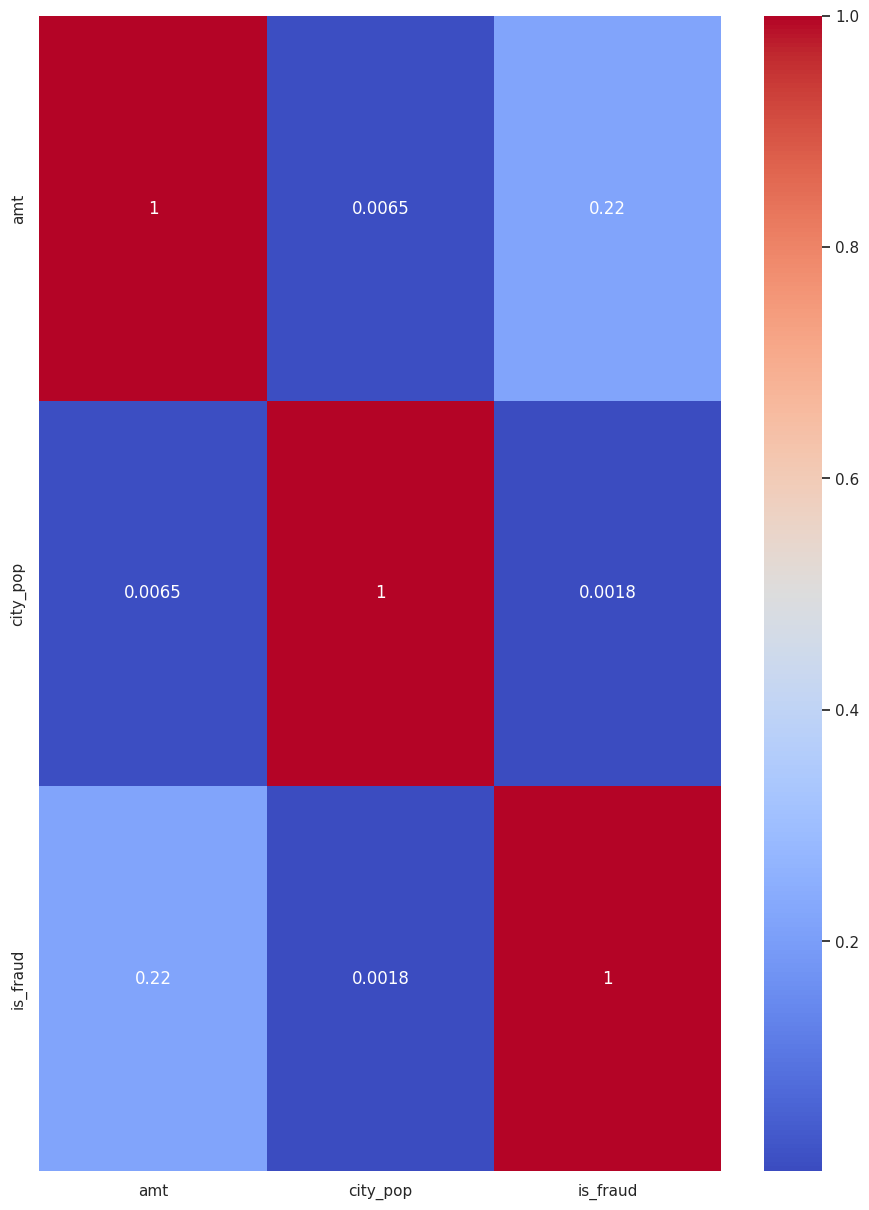

In [19]:
#Checking correlation in heatmap
plt.figure(figsize=(11,15))

sns.heatmap(train_corr, cmap="coolwarm", annot=True)
plt.show()

In [20]:
prof = ProfileReport(fraud_train)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

There is no high corr between variables

## 2.4 Check number/percent of fraud

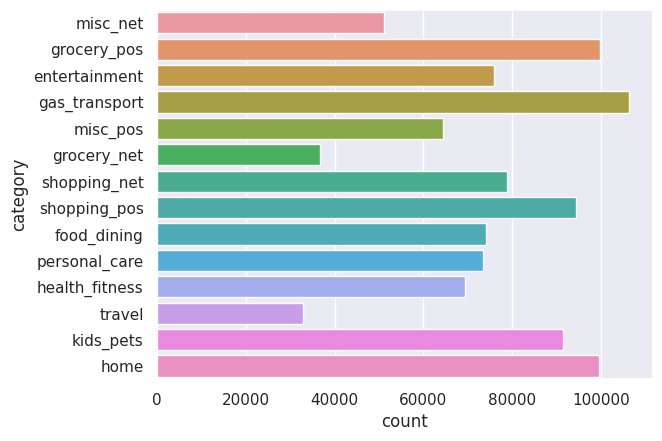

In [21]:
# Check numnber of transaction each category
sns.countplot(data=fraud_train, y='category')
plt.show()

- grocery_pos, gas_transport, shopping_pos, home, kit_pets had the highest number of transations

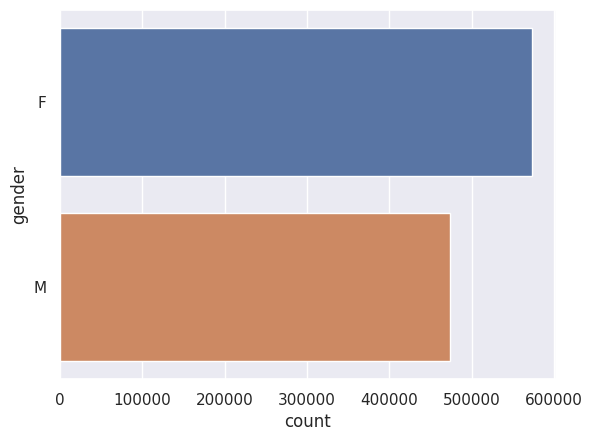

In [22]:
# Check number of gender in total transaction
sns.countplot(data=fraud_train, y='gender')
plt.show()

In [23]:
# # Top 20 city in which has the most transaction
# sns.countplot(y="state", data=fraud_train,
#               order=fraud_train.state.value_counts().iloc[:20].index)

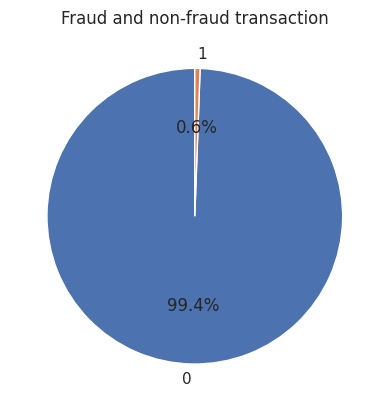

In [24]:
# Checking % of fraud in train set
fraud = fraud_train['is_fraud'].value_counts()
idx = fraud.index
val = fraud.values

plt.pie(val,
        labels = idx,
        autopct='%1.1f%%',
        startangle=90)
plt.title('Fraud and non-fraud transaction')
plt.show()

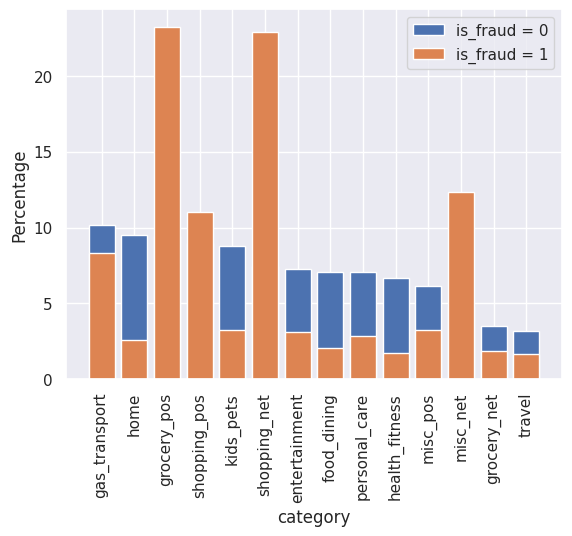

In [25]:
# Check which category has the most fraud transactions

# Separate the data by 'is_fraud' conditions
fraud_0 = fraud_train[fraud_train['is_fraud'] == 0]
fraud_1 = fraud_train[fraud_train['is_fraud'] == 1]

# Get the count of occurrences for each unique value in the 'category' column
counts_0 = fraud_0['category'].value_counts()
counts_1 = fraud_1['category'].value_counts()

# Calculate the percentage of occurrences for each category in both conditions
percent_0 = counts_0 / len(fraud_0) * 100
percent_1 = counts_1 / len(fraud_1) * 100

# Create a bar chart with the percentage for each category name in both conditions
plt.bar(percent_0.index, percent_0.values, label='is_fraud = 0')
plt.bar(percent_1.index, percent_1.values, label='is_fraud = 1')
plt.xlabel('category')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.legend()
plt.show()

- grocery_pos and shopping_net had no fraud transaction
- home_category, kid_pets, food_dimming, health_fifness had high percentage of fraud transaction

# **3.Feature Engineering**

Create funtion onehot_encoded to turn category values into binary values

In [26]:
def onehot_encoded(data, list_columns):

    from sklearn.preprocessing import OneHotEncoder
    import time
    '''Input is a list of category columns that will be encoded
    Output is a dataframe that have columns encoded and remove the old columns'''

    print('Start onehot process')
    st= time.time()
    one_hot_data = pd.get_dummies(fraud_train, columns = list_columns)
    return one_hot_data
    et = time.time()
    elaspe = (et-st)
    print('=> The process done in', elaspe,'s')

## 3.1 Turn 'category' feature to binary values for fraud_train DF

In [27]:
category_train_dum=pd.get_dummies(fraud_train['category'],drop_first=True)
gender_train_dum=pd.get_dummies(fraud_train['gender'],drop_first=True)

In [28]:
# Drop the original 'category' ,'gender' , 'merchant' columns
fraud_train.drop('category', axis=1, inplace=True)
fraud_train.drop('gender', axis=1, inplace=True)
fraud_train.drop('merchant', axis=1, inplace=True)


In [29]:
fraud_train_dum=pd.concat([fraud_train, category_train_dum, gender_train_dum], axis=1)

In [30]:
# onehot_encoded_data_train= onehot_encoded(fraud_train,list_columns = ['category', 'gender'])
# print(onehot_encoded_data_train)

In [31]:
# # Add the one-hot encoded columns to the original DataFrame
# fraud_train = pd.concat([fraud_train, onehot_encoded_data_train], axis=1)

# # Drop the original 'category' column
# fraud_train.drop('category', axis=1, inplace=True)
# fraud_train.drop('gender', axis=1, inplace=True)
# fraud_train.drop('merchant', axis=1, inplace=True)

# # Check that 'category', 'gender', 'merchant' are one-hot encoded
# print(fraud_train.columns)

## 3.2 Turn 'category' feature to binary values for fraud_test DF

In [32]:
category_test_dum=pd.get_dummies(fraud_test['category'],drop_first=True)
gender_test_dum=pd.get_dummies(fraud_test['gender'],drop_first=True)

In [33]:
# Drop the original 'category' ,'gender' , 'merchant' columns
fraud_test.drop('category', axis=1, inplace=True)
fraud_test.drop('gender', axis=1, inplace=True)
fraud_test.drop('merchant', axis=1, inplace=True)

In [34]:
fraud_test_dum=pd.concat([fraud_test, category_test_dum, gender_test_dum], axis=1)

In [35]:
# # Add the one-hot encoded columns to the original DataFrame
# fraud_test = pd.concat([fraud_test, onehot_encoded_data_test], axis=1)

# # Drop the original 'category' column
# fraud_test.drop('category', axis=1, inplace=True)
# fraud_test.drop('gender', axis=1, inplace=True)
# fraud_test.drop('merchant', axis=1, inplace=True)
# # Check that 'category', 'gender', 'merchant' are one-hot encoded
# print(fraud_test.columns)

In [36]:
fraud_train_dum.head()

,amt,city_pop,is_fraud,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,M
0,4.97,3495,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,107.23,149,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,220.11,4154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,45.00,1939,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,41.96,99,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


## 3.3 Split dataset to dependent and indepentden df

In [37]:
# split train dataset
y_train= fraud_train_dum['is_fraud']
x_train= fraud_train_dum.drop(['is_fraud'], axis=1)
# Split test dataset
y_test= fraud_test_dum['is_fraud']
x_test= fraud_test_dum.drop(['is_fraud'], axis=1)

In [38]:
# Check x_test DF
x_test.head()

,amt,city_pop,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,M
0,2.86,333497,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,29.84,302,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,41.28,34496,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,60.05,54767,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,3.19,1126,0,0,0,0,0,0,0,0,0,0,0,0,1,1


##  3.4 Scaler data

In [39]:
x_train_scaled=scaler.fit_transform(x_train)

In [40]:
x_test_scaled=scaler.fit_transform(x_test)

In [41]:
print(np.mean(x_train), np.std(x_train))
print(np.mean(x_train_scaled), np.std(x_train_scaled))

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


amt                  70.291677
city_pop          89060.828486
food_dining           0.070614
gas_transport         0.101499
grocery_net           0.035025
grocery_pos           0.095288
health_fitness        0.066159
home                  0.094973
kids_pets             0.087183
misc_net              0.048719
misc_pos              0.061493
personal_care         0.070107
shopping_net          0.075226
shopping_pos          0.089932
travel                0.031310
M                     0.452628
dtype: float64 amt                  159.973830
city_pop          302442.549663
food_dining            0.256179
gas_transport          0.301988
grocery_net            0.183843
grocery_pos            0.293612
health_fitness         0.248560
home                   0.293178
kids_pets              0.282103
misc_net               0.215281
misc_pos               0.240233
personal_care          0.255327
shopping_net           0.263755
shopping_pos           0.286085
travel                 0.174155
M        

In [42]:
print(np.mean(x_test), np.std(x_test))
print(np.mean(x_test_scaled), np.std(x_test_scaled))

amt                  69.397799
city_pop          88219.326077
food_dining           0.070659
gas_transport         0.101428
grocery_net           0.034959
grocery_pos           0.094571
health_fitness        0.065996
home                  0.094200
kids_pets             0.087622
misc_net              0.049245
misc_pos              0.062216
personal_care         0.070771
shopping_net          0.075173
shopping_pos          0.089591
travel                0.031401
M                     0.451356
dtype: float64 amt                  156.757544
city_pop          300374.924568
food_dining            0.256254
gas_transport          0.301895
grocery_net            0.183675
grocery_pos            0.292621
health_fitness         0.248275
home                   0.292107
kids_pets              0.282744
misc_net               0.216380
misc_pos               0.241548
personal_care          0.256441
shopping_net           0.263670
shopping_pos           0.285595
travel                 0.174398
M        

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


#   **4.Model Selection**

In [43]:
# Create list of models
models={'LogisticRegression': LogisticRegression(), 'KNN':KNeighborsClassifier(),
       'Desision Tree': DecisionTreeClassifier(), 'Random Forest':RandomForestClassifier() }

In [44]:
# Create variable to store results
results=[]

In [45]:
y_train=y_train.values

In [46]:
# for model in models.values():
#   kf=KFold(n_splits=6, random_state=42, shuffle=True)
#   cv_results=cross_val_score(model, x_train_scaled, y_train, cv=kf)
#   results.append(cv_results)

# plt.boxplot(results, labels=models.keys())
# plt.show()

## 4.1 LogisticRegression

In [47]:
log_reg = LogisticRegression()

In [48]:
log_reg.fit(x_train_scaled, y_train)
y_logreg_pred= log_reg.predict(x_test_scaled)

In [49]:
log_reg.score(x_test_scaled, y_test)

0.9955491643659584

In [50]:
# Compute confusion_matix of LogisticRegession classification
print(confusion_matrix(y_test, y_logreg_pred))

[[553153    328]
 [  2145      0]]


In [51]:
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_logreg_pred))

ACCURACY OF THE MODEL:  0.9955491643659584


In [52]:
# Compute resulting metrix of LogisticRegession classification
print(classification_report(y_test, y_logreg_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553481
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555626
   macro avg       0.50      0.50      0.50    555626
weighted avg       0.99      1.00      0.99    555626



Nhận xét:
-
-
-
-
-
-


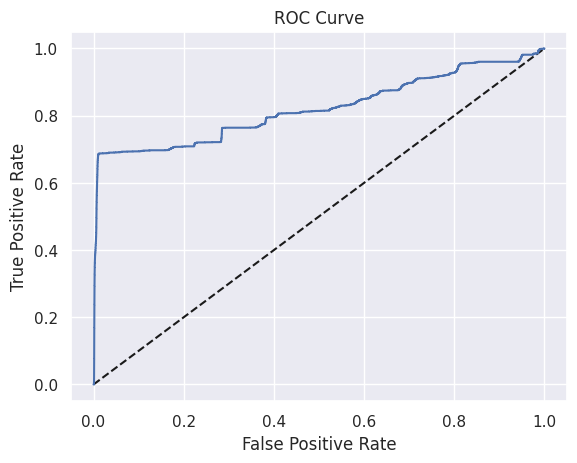

In [53]:
# Plot ROC curve
y_logreg_pred_prob= log_reg.predict_proba(x_test_scaled)[:,1]
# Generate ROX curve values: fpr, tpr, thresholds
fpr, tpr, thresholds= roc_curve(y_test, y_logreg_pred_prob)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## 4.2 KNeighborsClassifier


In [54]:
# Initiate knn classifier
knn=KNeighborsClassifier(n_neighbors=10)

Choose n_neighbors

In [ ]:
knn.fit(x_train_scaled, y_train)
y_knn_pred= knn.predict(x_test_scaled)
# Check accuracy
knn.score(x_test_scaled, y_test)

In [ ]:
# Compute confusion_matix of KNeighbors classification
print(confusion_matrix(y_test, y_knn_pred))

In [ ]:
# Compute resulting metrix of KNeighbors classification
print(classification_report(y_test, y_knn_pred))

## 4.3 RandomForest Classifier

In [56]:
# creating a RF classifier
rf = RandomForestClassifier(n_estimators = 100)

In [57]:
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
rf.fit(x_train_scaled, y_train)
# performing predictions on the test dataset
y_rf_pred = rf.predict(x_test_scaled)

In [58]:
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_rf_pred))

ACCURACY OF THE MODEL:  0.997422726798242


In [59]:
# Compute confusion_matix of KNeighbors classification
print(confusion_matrix(y_test, y_rf_pred))

[[552900    581]
 [   851   1294]]


In [60]:
# Compute resulting metrix of KNeighbors classification
print(classification_report(y_test, y_rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553481
           1       0.69      0.60      0.64      2145

    accuracy                           1.00    555626
   macro avg       0.84      0.80      0.82    555626
weighted avg       1.00      1.00      1.00    555626



## 4.4 DecisionTree Classifier

In [61]:
# Create Decision Tree classifer object
dtc = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtc.fit(x_train_scaled,y_train)

#Predict the response for test dataset
y_dct_pred = dtc.predict(x_test_scaled)

In [62]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_dct_pred))

Accuracy: 0.9959541130184693


In the 3 models above, RandomForest has the highest accuracy of 0.9974---> choose RandomForest as the evaluation model.